# <center><font color=blue> Lending Club Case Study </font></center>

<b>Problem Statement:</b>A Consumer finance company which specialises in lending various types of loans to urban customers wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.  

<b>Need for Analysis:</b> Lending loans to risky applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

<b>Objective:</b> Identification of risky loan applicants

In [9]:
# import required libraries

import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset and data-dictionary

<i>Loan Dataset conatins complete loan data for all loans issued through the time period 2007 t0 2011.</i><br>
<i>So the loan data set will be source for the analysis</i><br>
<i>Note: It has been mentioned that only the accepted loans data is present with company.</i><br>
<i>Rejected loans data is not present with company and also not present in the dataset as well.</i><br>
<i>Hence we have read only the LoanStats sheet (and not the RejectStats) of the data-dictionary excel</i><br>

In [10]:
# Reading the dataset

loan = pd.read_csv("./loan.csv",low_memory=False)
data_dictionary = pd.read_excel('./Data_Dictionary.xlsx', sheet_name='LoanStats')

In [11]:
# Check the shape of loan data set

loan.shape

(39717, 111)

In [12]:
# Seeing the sample data present in loan dataset

pd.set_option('display.max_columns', None)
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
# max_cols is used so that verbose output is shown even for dataframes with 125 columns
# By default, pandas truncate the output when the columns count is above pd.options.display.max_info_columns (=100)

loan.info(max_cols=125)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

In [14]:
# Removing the leading and trailing spaces of the columns names

print(loan.columns.str.strip())
loan.rename(columns=lambda x:x.strip(), inplace = True)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


### Comparing the fields against the data-dictionary

In [15]:
# Seeing the sample data in data_dictionary dataset

data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [16]:
# Final 2 records in the data-dictionary record is just a side note and hence can be removed

data_dictionary = data_dictionary[~data_dictionary.LoanStatNew.isnull()]

In [17]:
# After removing the unneccessary values

data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...


In [18]:
# Removing the leading and trailing spaces in the columns info in data-dictionary file

data_dictionary.LoanStatNew = data_dictionary.LoanStatNew.str.strip()

C:\Users\91967\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
# Columns in the loans dataset that is not mentioned in the data-dictionary

loan.columns[~loan.columns.isin(data_dictionary.LoanStatNew)]

Index(['verification_status_joint'], dtype='object')

In [20]:
# Columns in the data-dictionary file for which we do not have data in loan dataset

data_dictionary.LoanStatNew[~data_dictionary.LoanStatNew.isin(loan.columns)]

21           fico_range_high
22            fico_range_low
37      last_fico_range_high
38       last_fico_range_low
113    verified_status_joint
Name: LoanStatNew, dtype: object

##### From the above list, we could see that we do not have data for the following 4 fields
<i>fico_range_high, fico_range_low, last_fico_range_high, last_fico_range_low.</i><br>
<i>Also the field 'verified_status_joint' has been termed as 'verification_status_joint' in dataset.</i>

### Identifying primary key for loan dataset

<i>From the loan.info() output, it looks like 'id', 'member_id', 'url' are possible candidates for primary key. <br>
Following are the defintions provided in data dictionary<br>
<b>id</b> column is <b>'A unique LC assigned ID for the loan listing.'</b> <br>
<b>member_id</b> is <b>'A unique LC assigned Id for the borrower member.'</b> <br>
<b>url</b> is <b>'URL for the LC page with listing data.'</b><br>
Checking if we have unique values for these fields. </i>

In [21]:
# Check number of unique 'id' values in dataset

loan.id.nunique()

39717

In [22]:
# Check number of unique 'member_id' values in dataset

loan.member_id.nunique()

39717

In [23]:
# Check number of unique 'url' values in dataset

loan.url.nunique()

39717

<i>It looks like 'member_id' would be to denote a borrower and 'id' would be  is to denote a loan application.<br>
Since both are unique, we could infer that each borrower has only one loan application to his name
Removing the member_id and url field since we can uniquely identify the row based on 'id' incase if required. <br>
Also both member_id and url field will not provide us with any relevant information on the general trend </i>

In [24]:
# Removing 'member_id' and 'url' fields from the dataset

loan = loan.drop(['member_id','url'],axis=1)

### Defining re-usable functions to plot clean repetitive graphs

In [25]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 8
        # Vertical alignment for positive values
        va = 'bottom'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\ni.e.," + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label

In [26]:
# Vertical alignment for positive values
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, groupedby, loanstatus='Charged Off', sortvalues = True):
    grp = dataframe.groupby(['loan_status',groupedby])['id'].count()
    cnt = dataframe.groupby(groupedby)['id'].count()
    percentages = (grp.unstack() * 100 / cnt)
    if sortvalues:
        print(percentages.loc[loanstatus].sort_values(ascending = False))
        ax = percentages.loc[loanstatus].sort_values(ascending = False).plot.bar(color=sns.color_palette('husl', 10))
    else:
        print(percentages.loc[loanstatus])
        ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 10))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    return ax

In [27]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(2, 1, 1)
    values = (dataframe[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 10))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(2, 1, 2)
    
    values = (dataframe.loc[dataframe['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 10))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    
    showLabels(ax)

### Identifying dependant variable for loan dataset

'loan_status' is the dependant variable. <br>
We are trying to see how the other factors determine the loan_status. <br>
Loan status has 3 distinct values - 'Fully Paid', 'Current', Charged Off'. <br>
Records with loan_status as 'Charged Off' are the Defaulters

In [28]:
# Checking distinct loan_status

loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<i>Since we are interested only on those applicants which has either defaulted on fully paid, we can remove the on-going loans (i.e. loan_status = 'Current')

In [29]:
loan = loan[loan.loan_status != 'Current']

In [30]:
# Check the percentage of charged off and Fully Paid loans

loan.groupby('loan_status').count().transform(lambda x:round(x*100/x.sum())).id

loan_status
Charged Off    15.0
Fully Paid     85.0
Name: id, dtype: float64

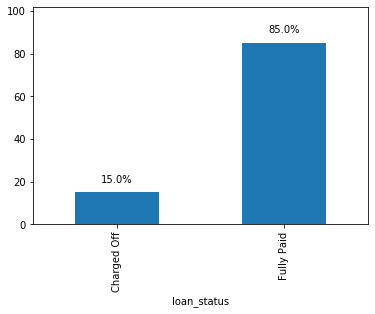

In [32]:
# Plotting the percentage of 'Charged Off' and 'Full Paid' loans

ax = loan.groupby('loan_status').count().transform(lambda x:round(x*100/x.sum())).id.plot.bar()
showLabels(ax)
plt.show()

<i><b>Observation:</b> <br>85% of loans are Fully Paid while only 15% have been Charged Off (or defaulted). <br> <br>
Since in the entire dataset, we have 15% of loan applicants as defaulters, we will keep 15% as benchmark in our analysis and any value greater than 15% will be of interest to us</i>

### Data Cleaning and handling null values

In [33]:
# Finding the number of columns that has only null values

(loan.isnull().sum()==loan.shape[0]).sum()

55

<i>We have 55 columns that have null values in it.</i> <br>
<i>(This also supports the loan.info() output in which shows 54 columns having 0 not-null count. One additional columns was 'next_pymnt_d' which had non-null values only for on-going loans)</i><br>
<i>Since having only null values does not help us in any analysis, we could remove them from our dataset</i>

In [34]:
# Remove all the 55 columns which have null values for all the rows

loan.dropna(how='all',axis=1,inplace=True)

<i>As shown below, we only have a maximum of 7 null values in a row (of 54 columns). Hence cannot remove any row. </i>

In [35]:
# Check the max number of null values in a single row

loan.isnull().sum(axis=1).max()

7

<i>11 columns in the below list has same value for the all the non-null rows.</i> <br>
<i>There might not be any useful information that could be infered from these and hence these columns could be removed from the dataset.</i>

In [36]:
# Number of Unique values in each column

loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
out_prncp                         1
collections_12_mths_ex_med        1
pymnt_plan                        1
out_prncp_inv                     1
term                              2
loan_status                       2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq      

In [37]:
# Printing the unique values in each of the 11 columns

print(loan.acc_now_delinq.value_counts())
print(loan.application_type.value_counts())
print(loan.chargeoff_within_12_mths.value_counts())
print(loan.collections_12_mths_ex_med.value_counts())
print(loan.delinq_amnt.value_counts())
print(loan.initial_list_status.value_counts())
print(loan.policy_code.value_counts())
print(loan.pymnt_plan.value_counts())
print(loan.tax_liens.value_counts())
print(loan.out_prncp.value_counts())
print(loan.out_prncp_inv.value_counts())

0    38577
Name: acc_now_delinq, dtype: int64
INDIVIDUAL    38577
Name: application_type, dtype: int64
0.0    38521
Name: chargeoff_within_12_mths, dtype: int64
0.0    38521
Name: collections_12_mths_ex_med, dtype: int64
0    38577
Name: delinq_amnt, dtype: int64
f    38577
Name: initial_list_status, dtype: int64
1    38577
Name: policy_code, dtype: int64
n    38577
Name: pymnt_plan, dtype: int64
0.0    38538
Name: tax_liens, dtype: int64
0.0    38577
Name: out_prncp, dtype: int64
0.0    38577
Name: out_prncp_inv, dtype: int64


In [38]:
# Removing the above 9 columns from the dataset

loan = loan.drop(['acc_now_delinq' , 'application_type', 'chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','initial_list_status','policy_code','pymnt_plan','tax_liens', 'out_prncp', 'out_prncp_inv'],axis=1)

In [39]:
# Following fields have missing values in it. Al other field have 0 null values.
# Getting the % of missing values in each column that has null values

loan.isnull().sum()[loan.isnull().sum() != 0]*100/loan.shape[0]

emp_title                  6.185033
emp_length                 2.677761
desc                      32.472717
title                      0.028514
mths_since_last_delinq    64.559193
mths_since_last_record    92.897322
revol_util                 0.129611
last_pymnt_d               0.184047
last_credit_pull_d         0.005184
pub_rec_bankruptcies       1.806776
dtype: float64

In [40]:
loan.desc.value_counts().head(10)

                                                                                                                                                                                                                                                     209
Debt Consolidation                                                                                                                                                                                                                                     8
Camping Membership                                                                                                                                                                                                                                     6
personal loan                                                                                                                                                                                                                                          3
Pers

In [41]:
loan.title.value_counts().head(10)

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
Credit Card Consolidation     348
Home Improvement              345
Debt consolidation            322
Small Business Loan           305
Credit Card Loan              301
Name: title, dtype: int64

<i>'desc' field has ~32% missing values. 'desc' field contains the detailed description for the loan. Since we have another categorical field 'purpose' that classifies loan applications to predefined cause, we can remove this field as well. <br>
'mths_since_last_record' has ~93% null values and 'mths_since_last_delinq' field has ~64% null values. Both these fields will be available only after the loan application is approved. Hence these fields might not be useful for our analysis <br>
Also 'title' field has info similar to that in both desc and purpose. It has detailed info of 'purpose' but less detailed than 'desc'. <br>
Hence removing the above mentioned fields from the dataset. <br>
</i>

In [42]:
loan = loan.drop(['mths_since_last_record' , 'mths_since_last_delinq', 'desc', 'title'],axis=1)

<i>We have three fields 'loan_amnt', 'funded_amnt', 'funded_amnt_inv' that are highly correlated. From a business perspective these will most probably the same. Since funded_amnt_inv is the actual amount that was lended out by the investor, we consider 'funded_amnt_inv' for our analysis and remove the other two </i>

In [43]:
loan = loan.drop(['funded_amnt' , 'loan_amnt'],axis=1)

In [44]:
loan.shape

(38577, 37)

### Imputing values for missing values

In [45]:
# Check mode for pub_rec_bankruptcies

loan.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [46]:
# Impute pub_rec_bankruptcies null values with mode of the column (0.0)

loan['pub_rec_bankruptcies'] = loan.pub_rec_bankruptcies.fillna(loan['pub_rec_bankruptcies'].mode()[0])

In [38]:
# Check value_counts for revol_util

loan.revol_util.value_counts()

0%        954
63%        62
0.20%      62
40.70%     57
31.20%     57
         ... 
0.83%       1
32.04%      1
0.86%       1
6.75%       1
39.95%      1
Name: revol_util, Length: 1088, dtype: int64

In [39]:
# Impute revol_util null values with mode of the column ('0%')

loan['revol_util'] = loan.revol_util.fillna(loan['revol_util'].mode()[0])

In [40]:
# check value_counts for last_payment_d

loan.last_pymnt_d.value_counts()

Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
          ... 
Nov-08      10
Jun-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [41]:
#Impute last_pymnt_d null values with mode of the column ('Mar-13')

loan['last_pymnt_d'] = loan.last_pymnt_d.fillna(loan['last_pymnt_d'].mode()[0])

In [42]:
# Check value_counts for last_credit_pull_d

loan.last_credit_pull_d.value_counts()

May-16    9333
Apr-16    2393
Mar-16    1122
Feb-13     843
Feb-16     733
          ... 
Jun-08       1
Jul-08       1
Jul-07       1
May-07       1
May-08       1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [43]:
#Impute last_credit_pull_d null values with mode of the column (May-16')

loan['last_credit_pull_d'] = loan.last_credit_pull_d.fillna(loan['last_credit_pull_d'].mode()[0])

In [44]:
# Check value_counts for emp_length

loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [45]:
#Impute emp_length null values with mode of the column '10+ years

loan['emp_length'] = loan.emp_length.fillna(loan['emp_length'].mode()[0])

In [46]:
# Checking for null values after data cleaning

loan.isnull().sum()[loan.isnull().sum() != 0]

emp_title    2386
dtype: int64

In [47]:
loan.emp_title.value_counts()

US Army                      131
Bank of America              107
IBM                           65
AT&T                          57
Kaiser Permanente             56
                            ... 
DCPS                           1
ITC                            1
Souther California Edison      1
Expedia  Inc.                  1
TM Forum                       1
Name: emp_title, Length: 28027, dtype: int64

<i>We do not have any significant frequency for a particular value that we can use to impute the null value with </i> <br>
<i>Hence leaving the null values as it is </i>

### Changing the datatype to relevant type

In [48]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   funded_amnt_inv          38577 non-null  float64
 2   term                     38577 non-null  object 
 3   int_rate                 38577 non-null  object 
 4   installment              38577 non-null  float64
 5   grade                    38577 non-null  object 
 6   sub_grade                38577 non-null  object 
 7   emp_title                36191 non-null  object 
 8   emp_length               38577 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

<i>Since we have the fields emp_length and int_rate as object data-type, checking the data and trying to convert it into numeric fields </i>

In [49]:
# Checking the values in emp_length field

loan.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [50]:
# Checking the values in int_rate field

loan.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.15%      1
21.48%      1
14.67%      1
22.94%      1
16.71%      1
Name: int_rate, Length: 370, dtype: int64

In [51]:
# Checking the values in revol_util field

loan.revol_util.value_counts()

0%        1004
63%         62
0.20%       62
40.70%      57
31.20%      57
          ... 
0.83%        1
32.04%       1
0.86%        1
6.75%        1
39.95%       1
Name: revol_util, Length: 1088, dtype: int64

In [52]:
# Converting the datatype to number datatype (int and float)

loan['int_rate'] = loan.int_rate.apply(lambda x: str(x[:-1])).astype('float64')
loan.revol_util = loan.revol_util.str.replace('%','').astype('float64')
loan.emp_length = loan.emp_length.replace({'10\+ years' : '10','< 1 year' :'0','1 year' : '1', ' years' : ''}, regex= True).astype('int')

In [53]:
# Datatypes after conversion

print(loan.int_rate.dtype)
print(loan.revol_util.dtype)
print(loan.emp_length.dtype)

float64
float64
int32


### Getting the co-relation between variables in loan dataset

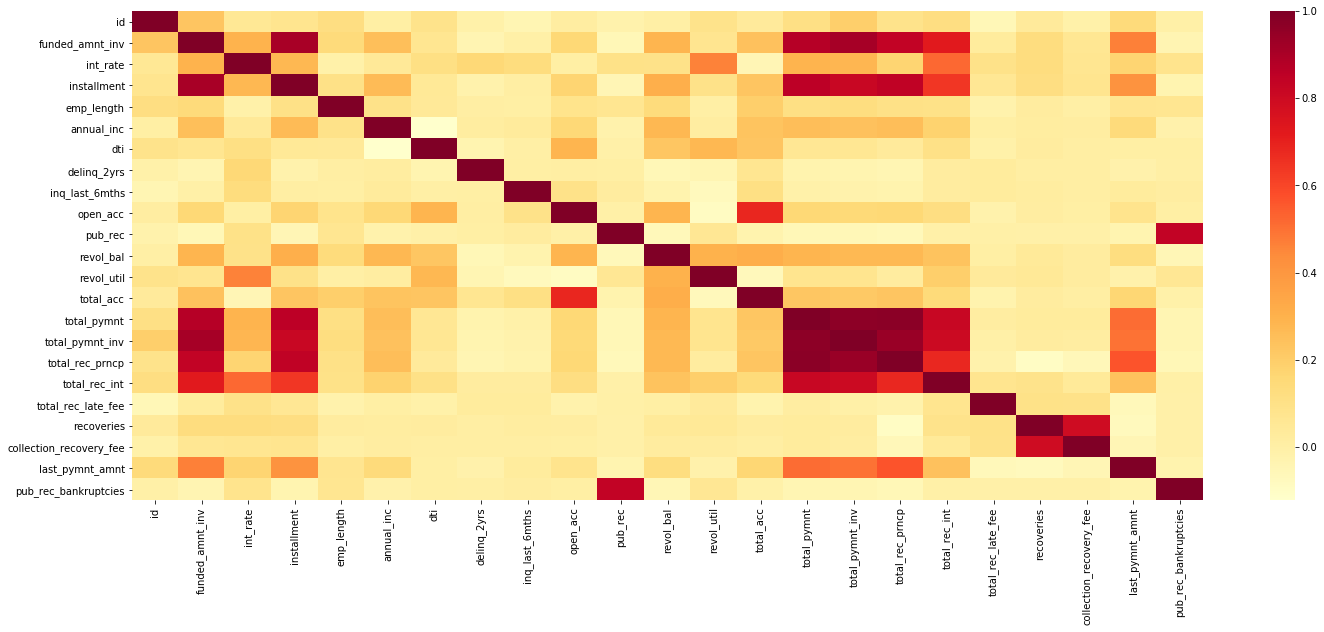

In [54]:
plt.figure(figsize=(24,9))
sns.heatmap(loan.corr(),cmap='YlOrRd')
plt.show()

### Analysing addr_state

<i>addr_state - The state provided by the borrower in the loan application. Categorical variable. <br>
Checking for any dependency of default rate on add_state<br> </i>

In [55]:
# Checking how loan applications is ditributed among different states

loan.addr_state.value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
OR     435
AL     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
HI     166
NH     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

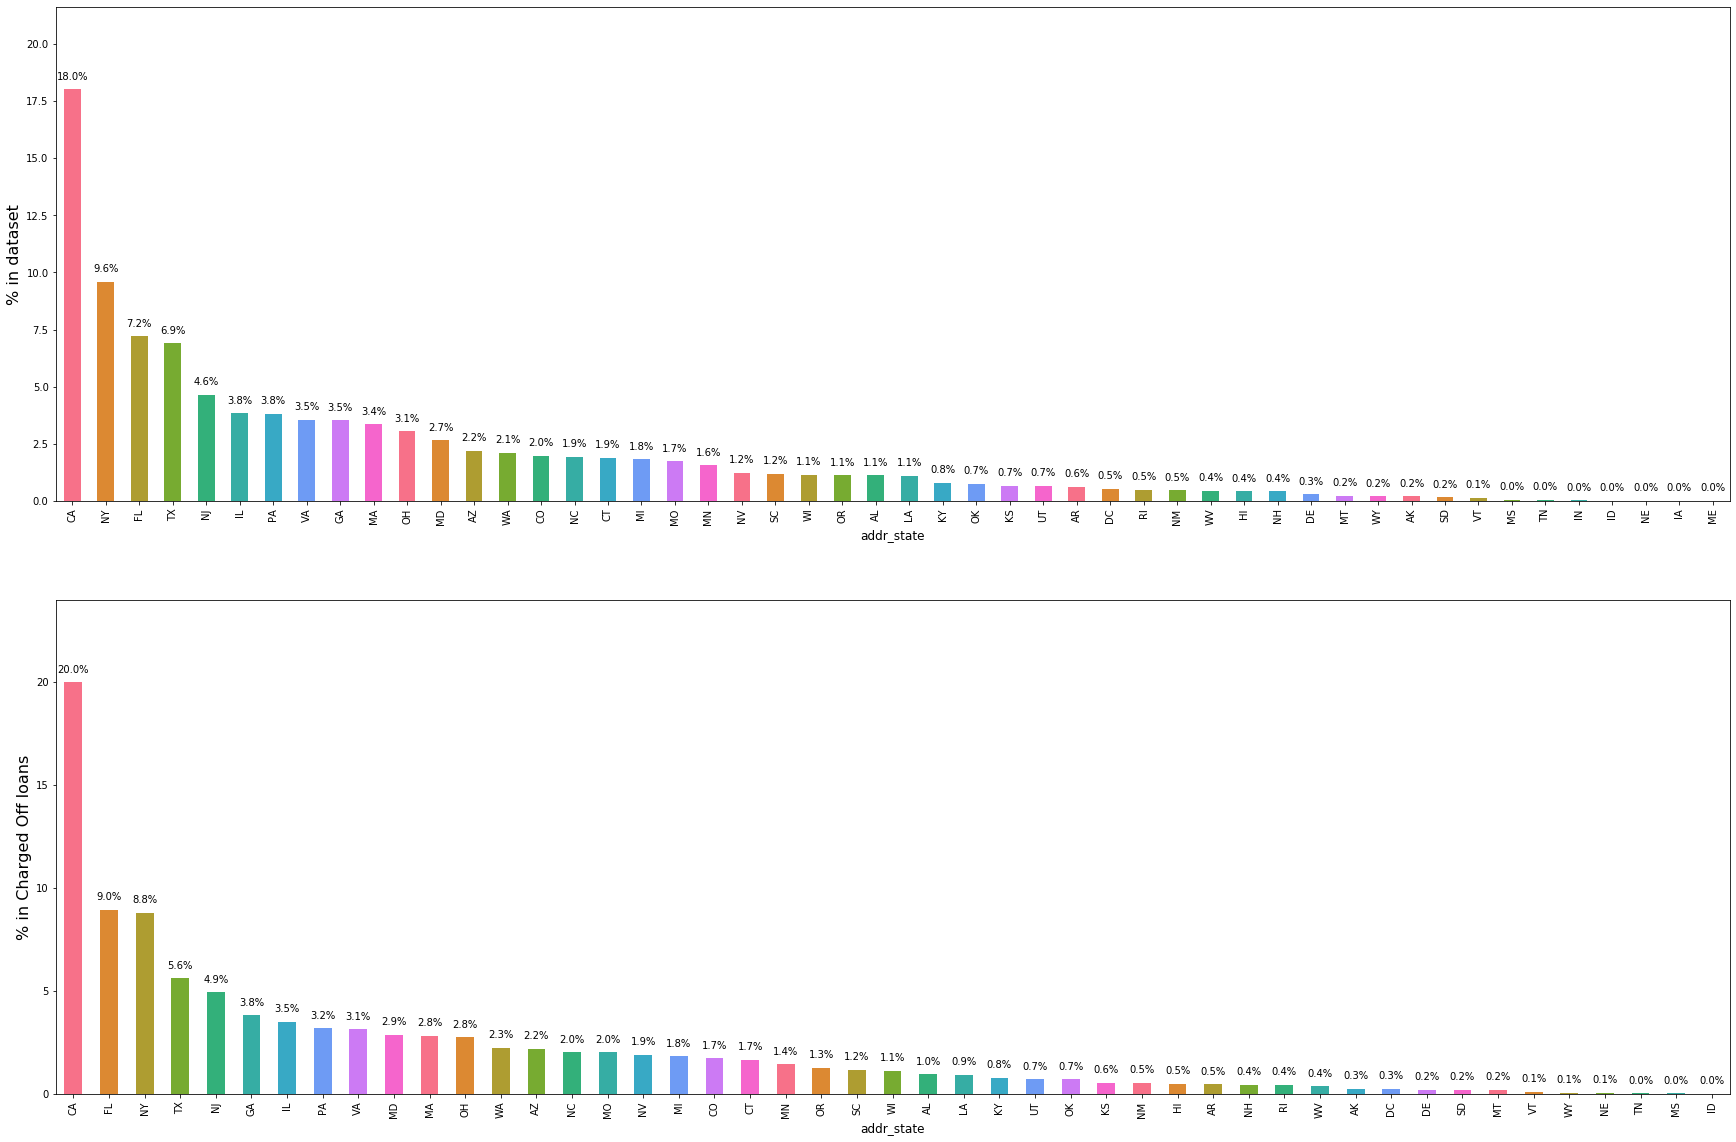

In [56]:
# Plotting the total loan applications and defaulted loans in each state a percentage of the whole dataset
# Below graph provides an understanding on how the data is distributed among each categories

plt.figure(figsize=[30,20])
plot_percentages(loan,'addr_state')

<i>Of the states that have sizable loan applications (atleast 500), 'Fl' has the highest default rate followed by 'MO' and 'CA</i>

addr_state
NE    60.000000
NV    22.546973
SD    19.354839
AK    19.230769
FL    18.122977
MO    17.014925
HI    16.867470
ID    16.666667
NM    16.393443
OR    16.321839
CA    16.189380
UT    15.873016
MD    15.835777
GA    15.820456
NJ    15.530726
WA    15.525672
NC    15.200000
NH    15.060241
MI    14.630682
AZ    14.487633
KY    14.469453
SC    14.379085
WI    14.318182
OK    13.937282
MN    13.388430
NY    13.385614
IL    13.328823
MT    13.253012
OH    13.157895
CT    12.947658
VA    12.929145
RI    12.886598
CO    12.793734
AL    12.413793
LA    12.412178
PA    12.261580
MA    12.259059
WV    12.209302
KS    12.156863
TX    11.884167
TN    11.764706
AR    11.489362
VT    11.320755
DE    10.619469
MS    10.526316
DC     7.109005
WY     5.000000
IA          NaN
IN          NaN
ME          NaN
Name: Charged Off, dtype: float64


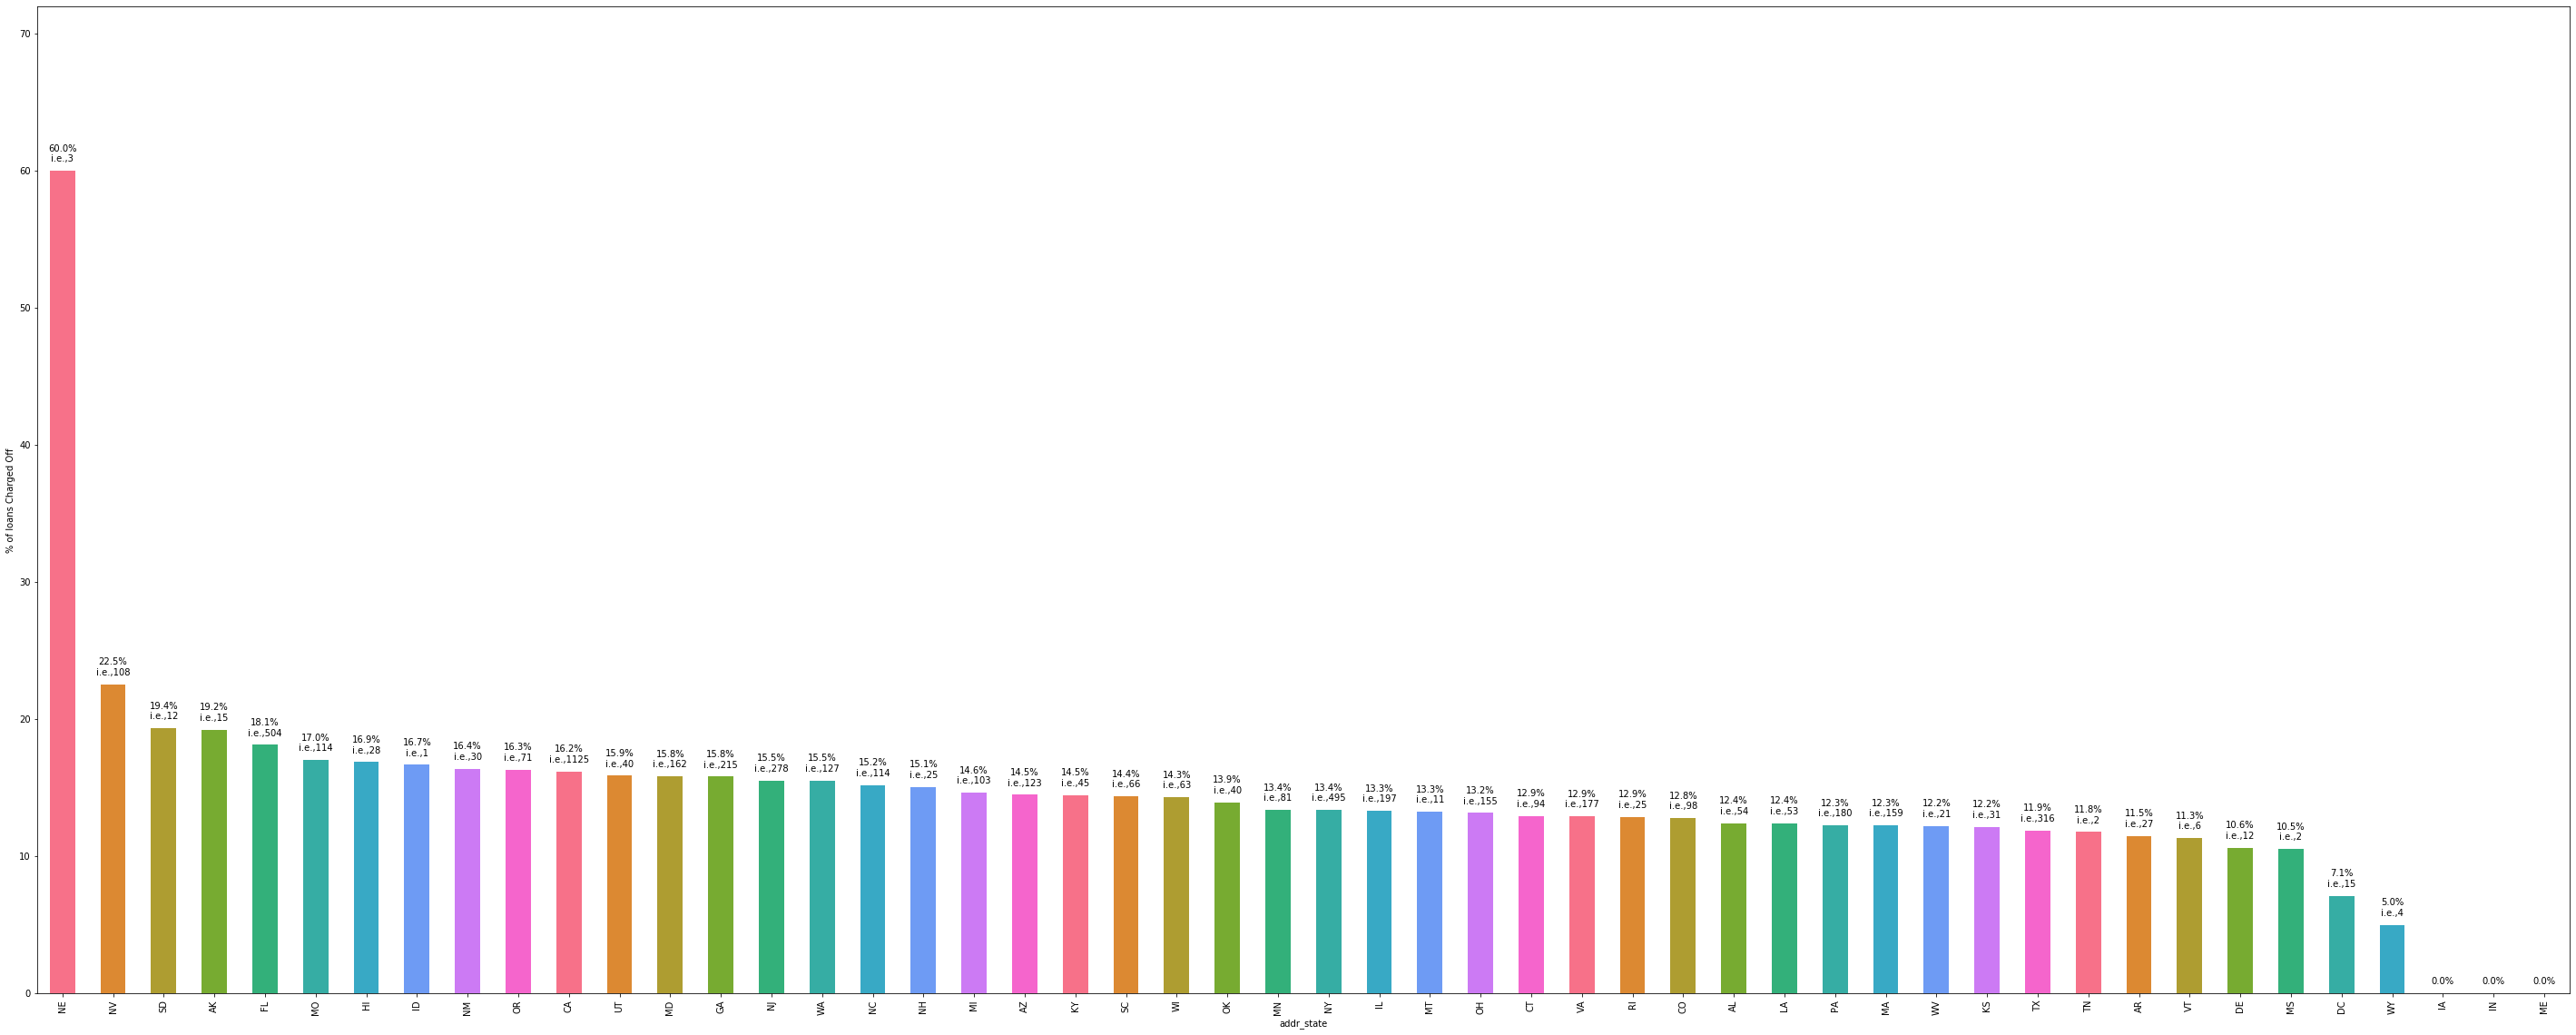

In [57]:
# Checking the default rate of each state

plt.figure(figsize=[50,20])
plotLoanStatus(loan,'addr_state')
plt.show()

In [58]:
# Checking how many loan applicants are contributed by the top 20 states 

loan.addr_state.value_counts()[loan.addr_state.value_counts()>500].sum()*100/loan.shape[0]

85.37988957150634

<i><b>Observations:</b> <br>We have majority of the loan applications from the state 'CA' followed by 'Ny' and 'FL'. Most of the loan applications are concenterated in few states. <br>
<b> 85% of loan applications are from 20 states (of total 50) </b> <br>
<b> Though the number of applicants are low, 'NE' has the highes default rate </b>
Of the states that have sizable loan applications (atleast 500), 'FL' has the highest default rate followed by 'MO' and 'CA</i>

### Analysing home_ownership

<i>home_ownership - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. Categorical variable. <br>
Checking for any dependency of default rate on home_ownership<br> </i>

In [59]:
# Checking how loan applications is ditributed among different home_ownership

loan.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

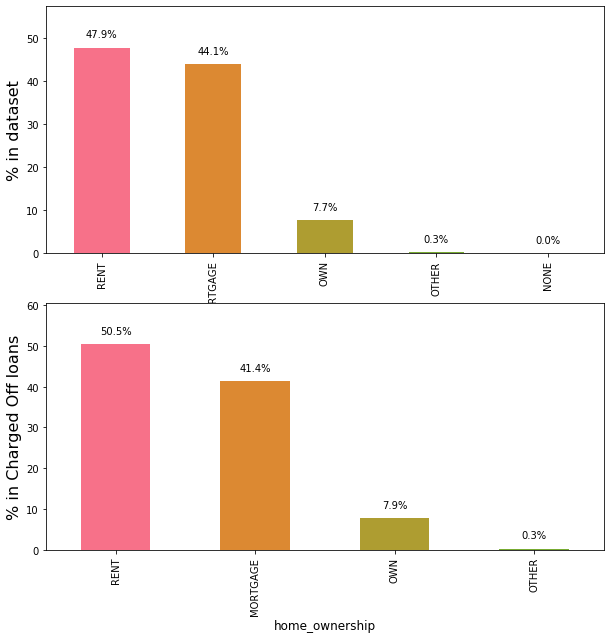

In [60]:
# Plotting the total loan applications and defaulted loans in each home_ownership a percentage of the whole dataset
# Below graph provides an understanding on how the data is distributed among each categories

plt.figure(figsize=[10,10])
plot_percentages(loan,'home_ownership')

home_ownership
OTHER       18.367347
RENT        15.362554
OWN         14.890756
MORTGAGE    13.671347
NONE              NaN
Name: Charged Off, dtype: float64


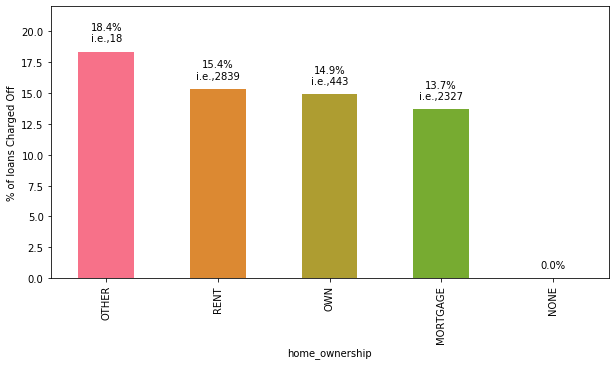

In [61]:
# Analysing the default percentage for each of home_ownership

plt.figure(figsize=[10,5])
plotLoanStatus(loan,'home_ownership')

<i><b>Observations:</b> <br>Most of the applicants are either Rented or has Mortgaged home ownership. <br>
<b> 'Other' has the highest chance of defaulting. Of the most two common ownership (Rent and Mortgage), Those who are rented has higher default rate. </b></i>

### Analysing emp_length

<i>emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. Ordered Categorical variable. <br> </i>

In [62]:
# Checking how loan applications is ditributed among different emp_length

loan.emp_length.value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

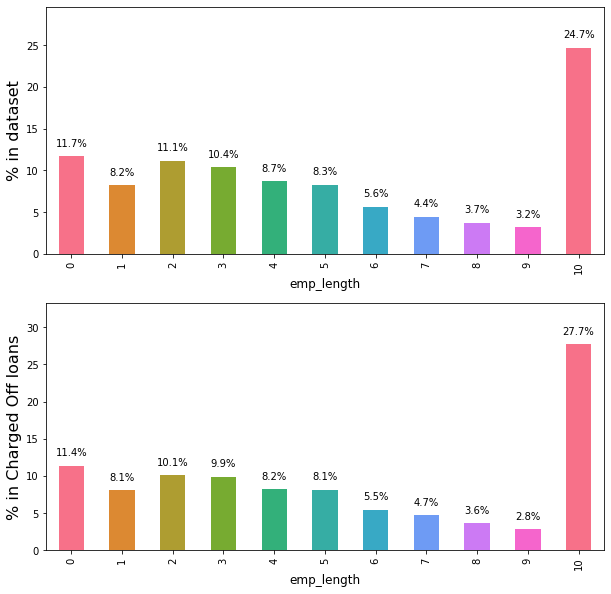

In [63]:
# Plotting the total loan applications and defaulted loans in each emp_length a percentage of the whole dataset
# Below graph provides an understanding on how the data is distributed among each categories

plt.figure(figsize=[10,10])
plot_percentages(loan,'emp_length',sortbyindex=True)

emp_length
0     14.174800
1     14.389397
2     13.213703
3     13.833500
4     13.824057
5     14.339386
6     14.160517
7     15.371128
8     14.146341
9     12.887439
10    16.374330
Name: Charged Off, dtype: float64


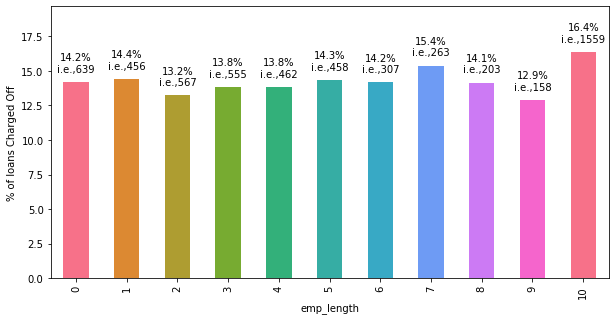

In [64]:
#Plotting the default percentage in each of the emp_length

plt.figure(figsize=[10,5])
plotLoanStatus(loan,'emp_length', sortvalues=False)
plt.show()

<i><b>Observations:</b> <br>Number of loan applicants (and number of defaulters) gradually decreases with increase in emp_length untill we reach emp_length = 10+ years. <br>
(This might be just because we are grouping everything greater than 10 in 10. <br>
<b>Highest default rate is observed in the emp_length 10+ years followed by 7 years<br>
Default rate increases from 2 to 7 years and then decreases from 7 to 9 years.<br>
A loan applicant is likely to default when the employment length is in the ranges 0-1 year, 5-7 years or more than 10 years compared to the others</b> </i>

### Analysing int_rate

<i>int_rate - Interest Rate on the loan. Numerical variable.<br>
Checking for any dependency of default rate on int_rate<br> </i>

In [65]:
# Rounding of the interest rate to nearest integer for analysis

loan['int_rate_rounded'] = loan.int_rate.apply(lambda x:round(float(x),0))
loan.int_rate_rounded.value_counts()

11.0    4953
13.0    4602
10.0    3398
8.0     3367
7.0     3267
12.0    3104
14.0    2835
16.0    2614
15.0    2546
6.0     1530
9.0     1504
17.0    1411
18.0    1095
19.0     788
5.0      573
20.0     446
21.0     308
22.0     171
23.0      42
24.0      23
Name: int_rate_rounded, dtype: int64

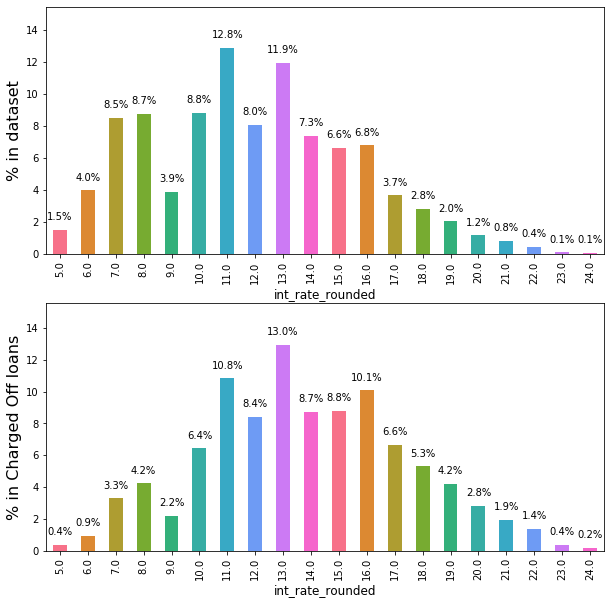

In [66]:
# Plotting the total loan applications and defaulted loans in each int_rate_rounded a percentage of the whole dataset
# Below graph provides an understanding on how the data is distributed among each categories

plt.figure(figsize=[10,10])
plot_percentages(loan,'int_rate_rounded',sortbyindex=True)

int_rate_rounded
5.0      3.490401
6.0      3.333333
7.0      5.662687
8.0      7.068607
9.0      8.244681
10.0    10.653325
11.0    12.315768
12.0    15.206186
13.0    15.840939
14.0    17.319224
15.0    19.402985
16.0    21.690895
17.0    26.506024
18.0    27.214612
19.0    30.076142
20.0    35.426009
21.0    35.389610
22.0    45.614035
23.0    50.000000
24.0    39.130435
Name: Charged Off, dtype: float64


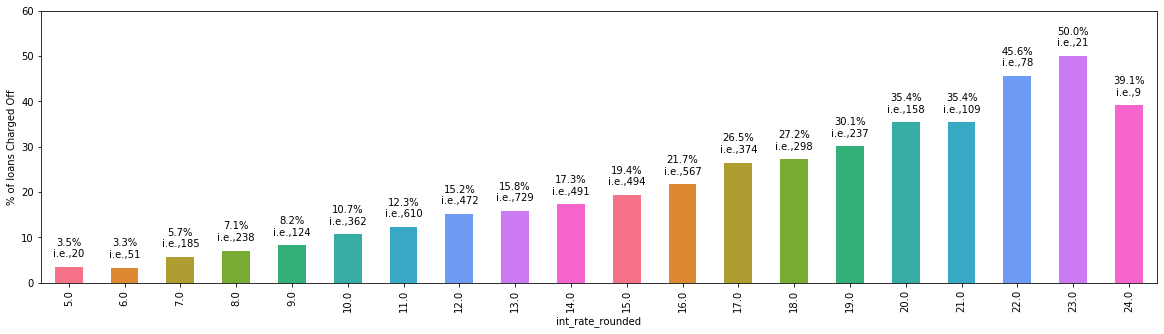

In [67]:
#Plotting the default percentage in each of the int_rate_rounded

plt.figure(figsize=[20,5])
plotLoanStatus(loan,'int_rate_rounded', sortvalues=False)
plt.show()

<i><b>Observations:</b> <br>
There is a clear trend here. <br>
<b>The Charge Off percentage increases with increasing interest rate. </b> The trend holds even for the interest rates 7-16 where the number of loan applicants are more.</i>
LC having the right stratergy.  int_rate > 13 have high chance of default.</i>

### Analysing annual_inc

<i>annual_inc - The self-reported annual income provided by the borrower during registration.. Numerical variable.<br>
Checking for any dependency of default rate on annual_inc<br> </i>

In [68]:
# Getting the details of annual_inc field

loan.annual_inc.describe()/1000

count      38.577000
mean       68.777974
std        64.218682
min         4.000000
25%        40.000000
50%        58.868000
75%        82.000000
max      6000.000000
Name: annual_inc, dtype: float64

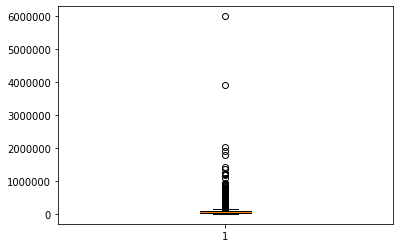

In [69]:
# Plotting the boxplot to identfy the outliers

plt.boxplot(loan.annual_inc)
plt.show()

<i> Removing the outliers lying outside the 95th percentile region </i>

In [70]:
loan_annual = loan[loan.annual_inc < np.percentile(loan.annual_inc,95)]

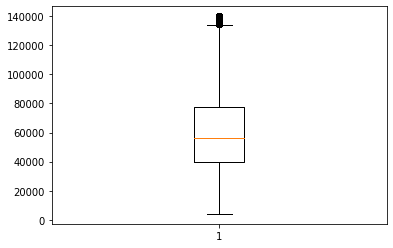

In [71]:
# Plotting the boxplot after removing outliers

plt.boxplot(loan_annual.annual_inc)
plt.show()

In [72]:
loan_annual.annual_inc.describe()

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64

In [73]:
# Classifying the income group to 3 (low - <25%, Medium - 25 - 50% and 'high' > 75%)

loan_annual['annual_inc_grp'] = loan_annual.annual_inc.apply(lambda x: 1 if x < 40000 else (3 if x > 73000 else 2))

F:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


annual_inc_grp
1    18.036865
2    14.920672
3    11.853590
Name: Charged Off, dtype: float64


<Figure size 1080x360 with 0 Axes>

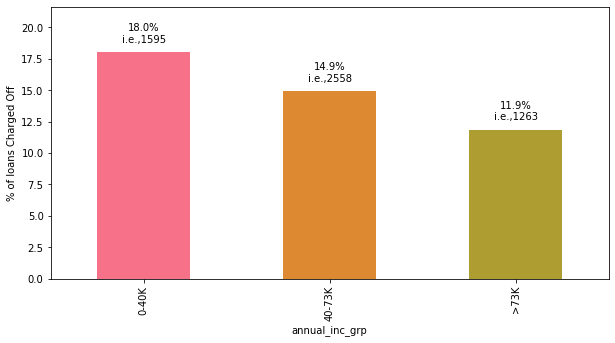

<Figure size 1080x360 with 0 Axes>

In [74]:
#Plotting the default percentage in each of the annual_inc group

plt.figure(figsize=[10,5])
xtick = ['0-40K','40-73K','>73K']
brplt = plotLoanStatus(loan_annual,'annual_inc_grp', sortvalues=False)
brplt.set(xticklabels=xtick)
plt.figure(figsize=[15,5])

<i><b>Observation</b><br>
Lower the salary more likely it is to default. Also there is a clear trend that shows that the default percentage decreases with increase in salary </i>

### Analysing grade

<i>grade - LC assigned loan grade. Values are: A-G. Ordered Categorical variable. A indicates strong credit profile and G indicates a weak credit profile<br>
Checking for any dependency of default rate on grade<br> </i>

In [75]:
# Checking how loan applications is ditributed among different grades

loan.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

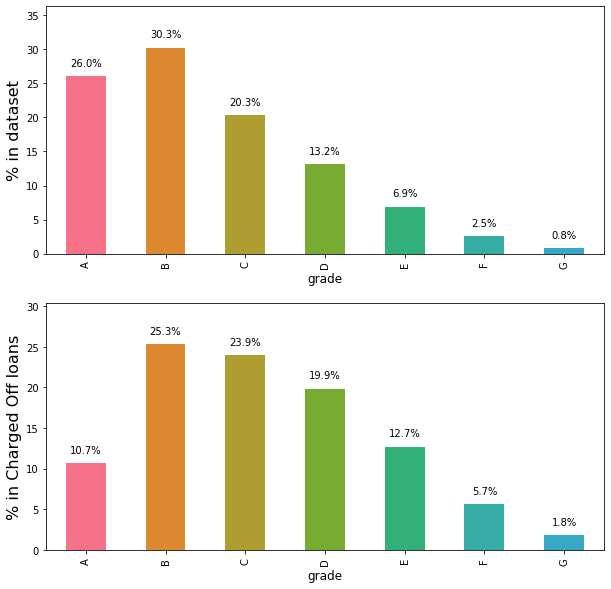

In [76]:
# Plotting the total loan applications and defaulted loans in each grade a percentage of the whole dataset
# Below graph provides an understanding on how the data is distributed among each categories

plt.figure(figsize=[10,10])
plot_percentages(loan,'grade',sortbyindex=True)

grade
G    33.779264
F    32.684426
E    26.849418
D    21.986234
C    17.194281
B    12.205567
A     5.993031
Name: Charged Off, dtype: float64


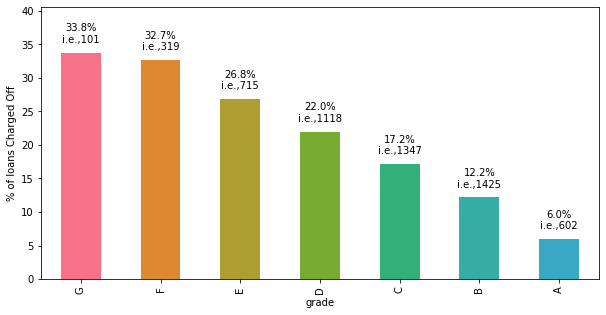

In [77]:
# Analysing the default rate for each of the grades

plt.figure(figsize=[10,5])
plotLoanStatus(loan,'grade')
plt.show()

<i><b>Observation</b><br>There is a clear trend here. <br>
<b>Higher the credit strength less likely is an applicant to default. </b>
LC is doing the correct stratergy</i>

### Analysing sub_grade

<i>sub_grade - LC assigned loan subgrade. Values are: A1-G5. Ordered Categorical variable. Within each grade, credit profile strength decreases from 1 to 5<br>
Checking for any dependency of default rate on sub_grade<br> </i>

In [78]:
# Checking how loan applications is ditributed among different subgrades

loan.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

sub_grade
A1     2.633889
A2     4.907162
A3     5.690608
A4     6.195614
A5     7.992634
B1     9.515860
B2    11.394303
B3    12.070796
B4    13.500205
B5    13.613767
C1    16.350365
C2    16.623511
C3    18.145161
C4    17.578773
C5    18.024263
D1    17.937701
D2    21.073095
D3    22.939068
D4    23.420479
D5    25.059952
E1    27.423823
E2    26.547231
E3    23.062016
E4    29.716981
E5    28.165375
F1    29.836066
F2    30.042918
F3    29.310345
F4    35.099338
F5    47.787611
G1    32.978723
G2    36.363636
G3    42.222222
G4    24.074074
G5    34.482759
Name: Charged Off, dtype: float64


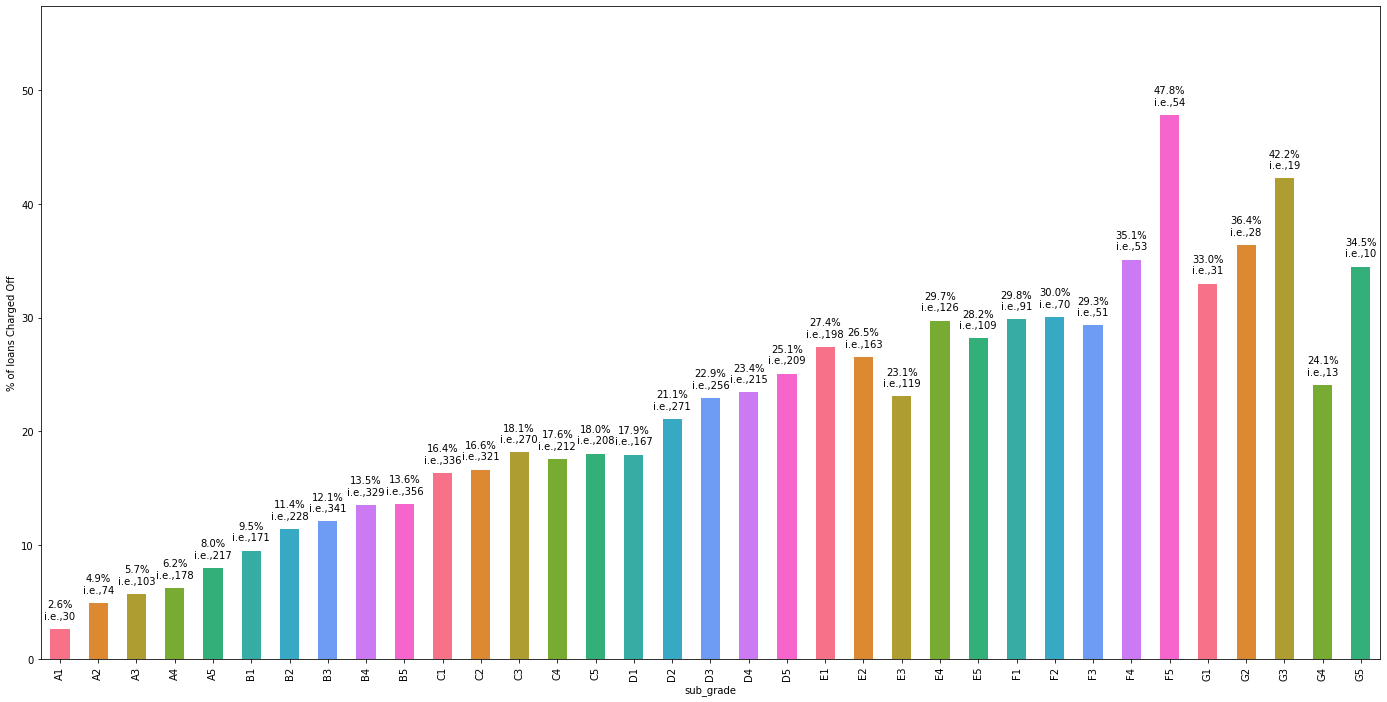

In [79]:
# Plotting the total loan applications and defaulted loans in each sub_grade a percentage of the whole dataset
# Below graph provides an understanding on how the data is distributed among each categories

plt.figure(figsize=[24,12])
plotLoanStatus(loan,'sub_grade',sortvalues = False)

<i><b>Observations:</b><br>There is a clear trend here. <br>
<b>Even within a grade, default percentage increases as the sub-grade moves from 1 to 5. </b>This holds for grades (A-E), for F and G the number of applicants and defaulters are small and hence the percentage fluctuates</i>

### Analysing dti

<i>dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the .Numerical field<br>
Checking for any dependency of default rate on dti<br> </i>

In [80]:
# Describing the details of dti field
loan.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [81]:
# Classifying the dti values into groups of width 2

loan['dti_grp'] = loan.dti.apply(lambda x : math.floor(x/2))
loan = loan.sort_values(by='dti_grp')
loan['dti_grp'] =loan.dti_grp.apply(lambda x:(str(int(x*2))+'-'+str(int(x*2+2)) ))

In [82]:
dti_piv = loan.pivot_table(index='loan_status',columns=['dti_grp'],values='id',aggfunc='count').transpose()
dti_piv[~dti_piv['Charged Off'].isnull()]

loan_status,Charged Off,Fully Paid
dti_grp,,
0-2,228,1603
10-12,503,3206
12-14,588,3337
14-16,576,3316
16-18,558,2974
18-20,568,2822
2-4,249,1708
20-22,499,2448
22-24,444,2137


dti_grp
0-2      12.452212
10-12    13.561607
12-14    14.980892
14-16    14.799589
16-18    15.798414
18-20    16.755162
2-4      12.723556
20-22    16.932474
22-24    17.202635
24-26    16.830870
26-28    12.543554
28-30    12.565445
4-6      11.339009
6-8      12.635735
8-10     13.508872
Name: Charged Off, dtype: float64


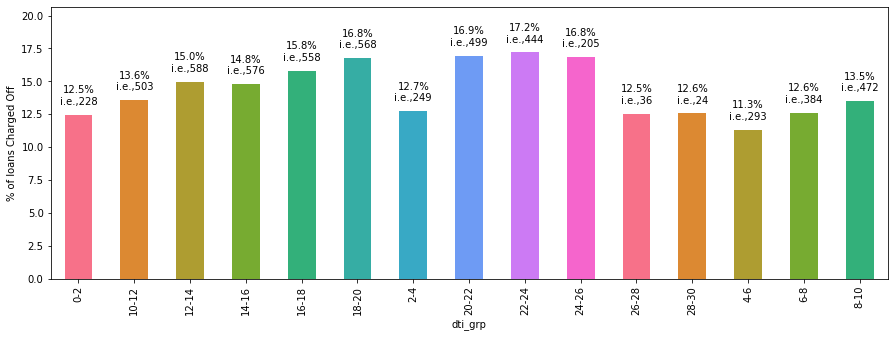

In [83]:

plt.figure(figsize=[15,5])
plotLoanStatus(loan,'dti_grp',sortvalues=False)
plt.show()

<b>Observations:</b><br>
 1. The percentage Charged of increases with increasing dti

### Analysing purpose

<i>purpose - A category provided by the borrower for the loan request. Categorical variable. <br>
Analysing which purpose loans are more likely to default <br> </i>

In [84]:
loan.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

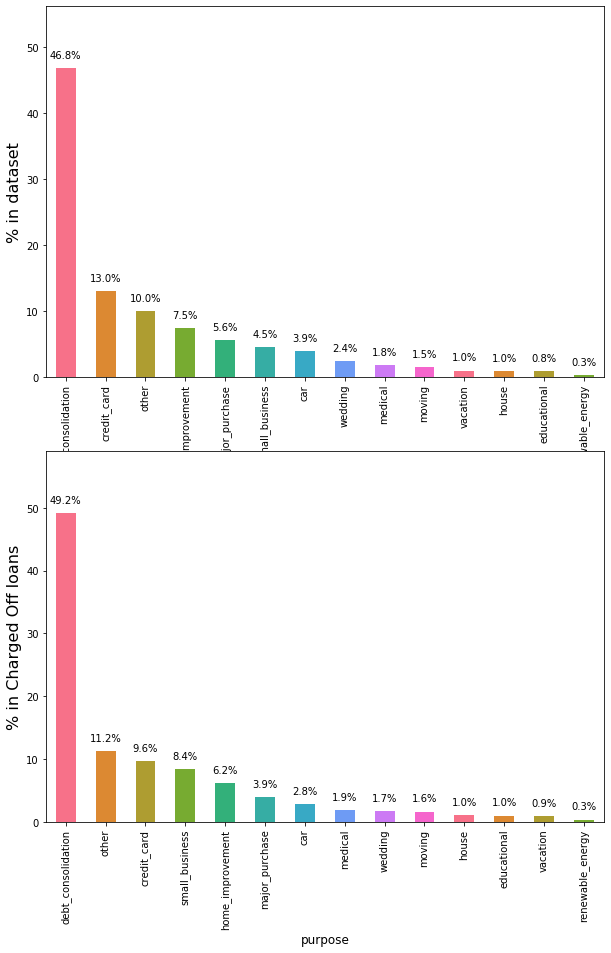

In [85]:
# Plotting the total loan applications and defaulted loans in each purpose a percentage of the whole dataset
# Below graph provides an understanding on how the data is distributed among each categories

plt.figure(figsize=[10,15])
plot_percentages(loan,'purpose')

purpose
small_business        27.080958
renewable_energy      18.627451
educational           17.230769
other                 16.377749
house                 16.076294
moving                15.972222
medical               15.565345
debt_consolidation    15.325395
vacation              14.133333
home_improvement      12.069565
credit_card           10.781778
car                   10.673783
wedding               10.367171
major_purchase        10.325581
Name: Charged Off, dtype: float64


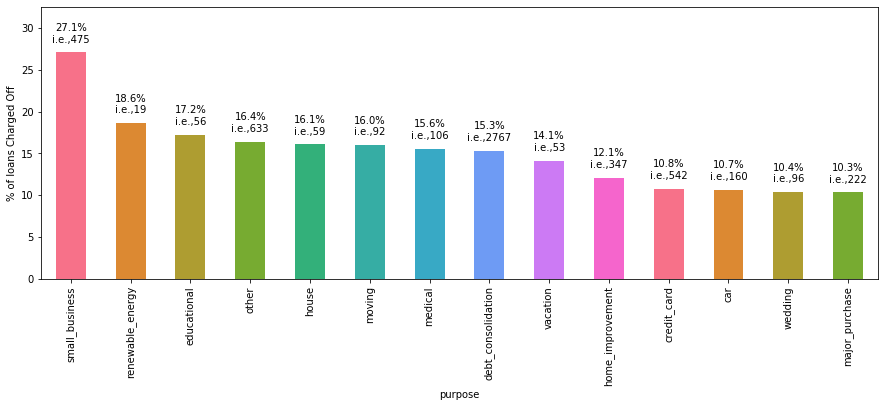

In [86]:
# Analysing the default percentage for each of purpose

plt.figure(figsize=[15,5])
plotLoanStatus(loan,'purpose')
plt.show()

<i><b>Observation:</b><br>
<b>small_business high percentage of default followed by renewable_energy</b>. Around 26% of the loans for small_business had been defaulted while for renewable_energy it is at 18% <br>
Also majority of the loans have been taken for debt consolidation (~ 50%) and there is considerable number of (~ 15%) of defaulters in that category</i>

### Analysing verification_status

<i>verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified. Categorical variable. <br>
Analysing which if a applican is likely to default if income is not verified<br></i>

In [87]:
loan.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

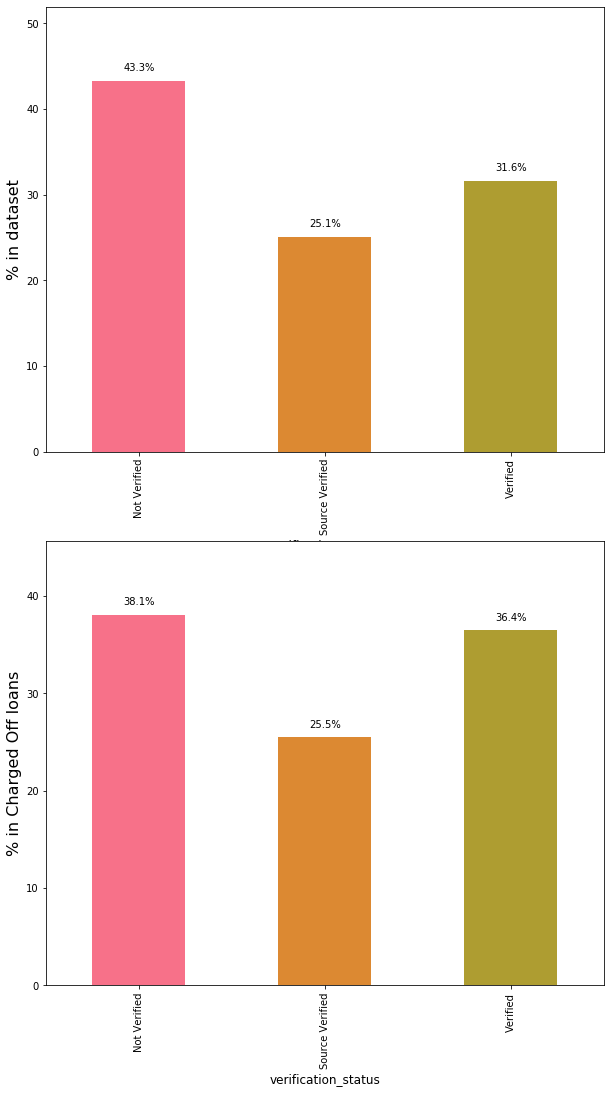

In [88]:
# Plotting the total loan applications and defaulted loans in each verification_status a percentage of the whole dataset
# Below graph provides an understanding on how the data is distributed among each categories

plt.figure(figsize=[10,18])
plot_percentages(loan,'verification_status',sortbyindex=True)

verification_status
Verified           16.803212
Source Verified    14.818642
Not Verified       12.830957
Name: Charged Off, dtype: float64


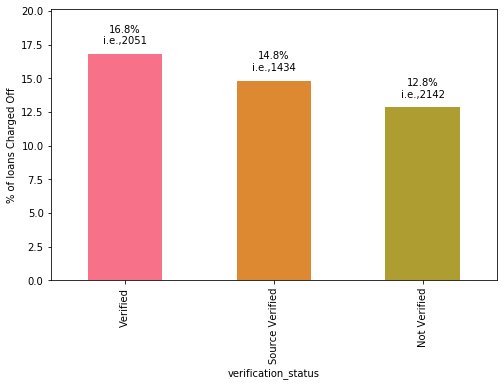

In [89]:
#Plotting the default percentage in each of the verification_status

plt.figure(figsize=[8,5])
plotLoanStatus(loan,'verification_status')
plt.show()

<i><b>Observations:</b><br>
From the analysis, we could not conclude anything. % of non-verified applicants that defaulted is similar to those inocme verified applicant. </i>

### Analysing funded_amnt_inv

<i>funded_amnt_inv - The total amount committed by investors for that loan at that point in time. Numerical variable. <br> </i>

In [90]:
loan.funded_amnt_inv.describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [91]:
loan['funded_amnt_grp'] = loan.funded_amnt_inv.apply(lambda x : round(int(x)/7000,0))
loan.sort_values(by='funded_amnt_grp')
loan['funded_amnt_grp'] = loan.funded_amnt_grp.apply(lambda x:(str(int(x*7000))+'-'+str(int(x*7000+7000)) ))

In [92]:
loan['funded_amnt_grp'].value_counts()

7000-14000     18105
14000-21000     9028
0-7000          5677
21000-28000     3818
28000-35000     1410
35000-42000      539
Name: funded_amnt_grp, dtype: int64

funded_amnt_grp
0-7000         15.342611
14000-21000    14.698715
21000-28000    18.046097
28000-35000    16.737589
35000-42000    23.562152
7000-14000     13.128970
Name: Charged Off, dtype: float64


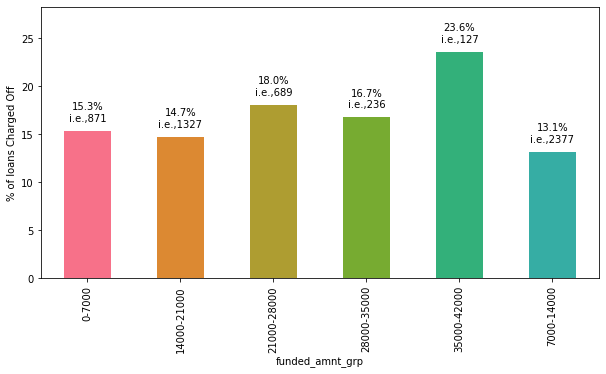

In [93]:
#Plotting the default percentage in each of the funded_amnt_grp

plt.figure(figsize=[10,5])
plotLoanStatus(loan,'funded_amnt_grp',sortvalues=False)
plt.show()

<b>Observation</b>
 1. The default percentage is high in funded_amt_inv range (21,000-42,000)

### Analysing term

<i>funded_amnt_inv - The total amount committed by investors for that loan at that point in time. Numerical variable. <br> </i>

In [94]:
#Check the effect of term on payment of loan
term_piv = loan.pivot_table(index='loan_status',columns='term',values='id',aggfunc='count').transpose().sort_values(by='Charged Off',ascending=False)

term_piv

loan_status,Charged Off,Fully Paid
term,,
36 months,3227,25869
60 months,2400,7081


term
 60 months    25.313785
 36 months    11.090872
Name: Charged Off, dtype: float64


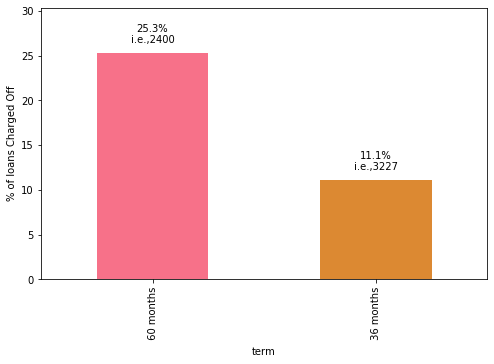

In [95]:
# Plot a bar graph to analyze this
plt.figure(figsize=[8,5])
plotLoanStatus(loan,'term')
plt.show()

<b>Observations:</b> <br>
 1. The Charged Off percentage is higher if term is 60 months

### Analysing issue_d

<i>issue_d - The month which the loan was funded. Ordered Categorical variable. <br> </i>

In [96]:
# Retrieve month from issue_d column

loan['mon_issued'] = loan.issue_d.apply(lambda x : str(x).split('-')[0])
loan['mon_issued']

26730    Aug
25016    Oct
9254     Aug
25011    Oct
27567    Jul
        ... 
13962    Jun
8199     Sep
8155     Sep
2453     Dec
20714    Jan
Name: mon_issued, Length: 38577, dtype: object

mon_issued
Dec    16.085409
May    15.964371
Sep    15.637507
Oct    15.421430
Jun    15.188679
Nov    14.927609
Jul    14.294241
Aug    13.813459
Jan    13.493064
Apr    13.069587
Mar    12.894835
Feb    12.298558
Name: Charged Off, dtype: float64


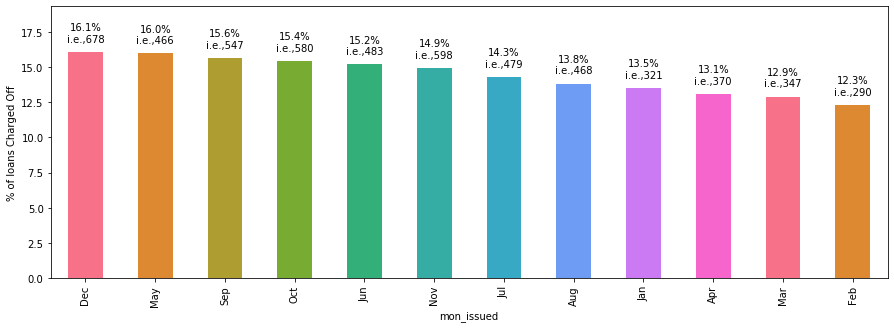

In [97]:
# Analyse on number of defaults based on month in which loan was issued

plt.figure(figsize=[15,5])
plotLoanStatus(loan,'mon_issued')
plt.show()

<b>Observation</b>
 1. The default percentage is high in months of Dec,May,Sep,Oct,Jun

In [98]:
# Check value_counts for delinq_2yrs
loan.delinq_2yrs.value_counts()

0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

delinq_2yrs
8     50.000000
7     25.000000
4     21.666667
2     19.316493
3     16.509434
1     15.809167
0     14.354679
5     14.285714
6     10.000000
9           NaN
11          NaN
Name: Charged Off, dtype: float64


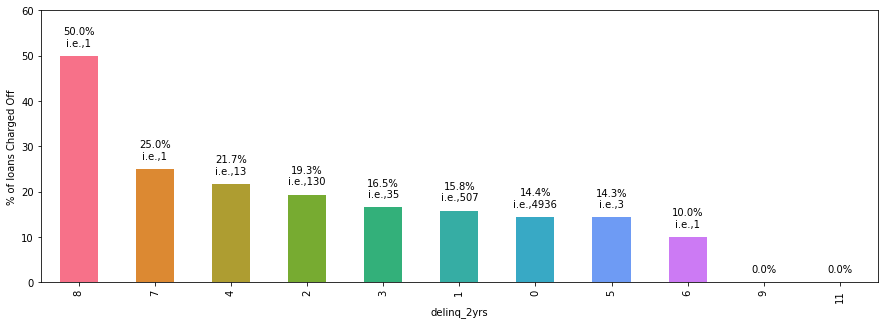

In [99]:
# Analyse on number of defaults based on month in which loan was issued
plt.figure(figsize=[15,5])
plotLoanStatus(loan,'delinq_2yrs')
plt.show()

<b>Observations</b>
 1. With increasing delinq_2yrs the percentage of defaults tends to be increasing mostly .
 2. At delinq_2yrs 1 and 2 the number of defaults are high as well as percentage of defaults is above 15%. 
 3. Having made the above observations, I don't think Lending club would be able to make a descision on accepting or rejecting loan based on this as this comes into picture after loan has been approved and funded

### Analysing pub_rec_bankruptcies

<i>pub_rec_bankruptcies - Number of public record bankruptcies. Ordered Categorical variable ranging from 0-2. <br>
This might have an impact like higher the number of pub_rec_bankruptcies, more probability to default <br></i>

pub_rec
1    22.702434
2    20.833333
0    14.134276
3          NaN
4          NaN
Name: Charged Off, dtype: float64


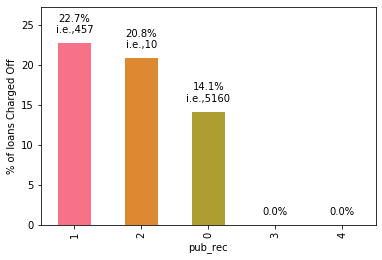

In [100]:
plotLoanStatus(loan,'pub_rec')

<b>Observation</b>
 1. The percentage of default is high with pub_rec 1 and 2

pub_rec_bankruptcies
2.0    40.000000
1.0    22.357972
0.0    14.238527
Name: Charged Off, dtype: float64


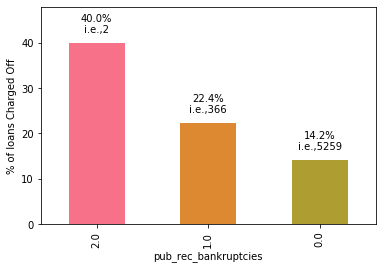

In [101]:
plotLoanStatus(loan,'pub_rec_bankruptcies')

<b>Observatios</b>
 1. The default percentage increases with increasing pub_rec_bankruptcies.

### Analysing funded_amnt_inv and annual_inc

<i>Checking how the variable 'funded_amnt_inv' and 'annual_inc' has an impact on the default rate <br></i>

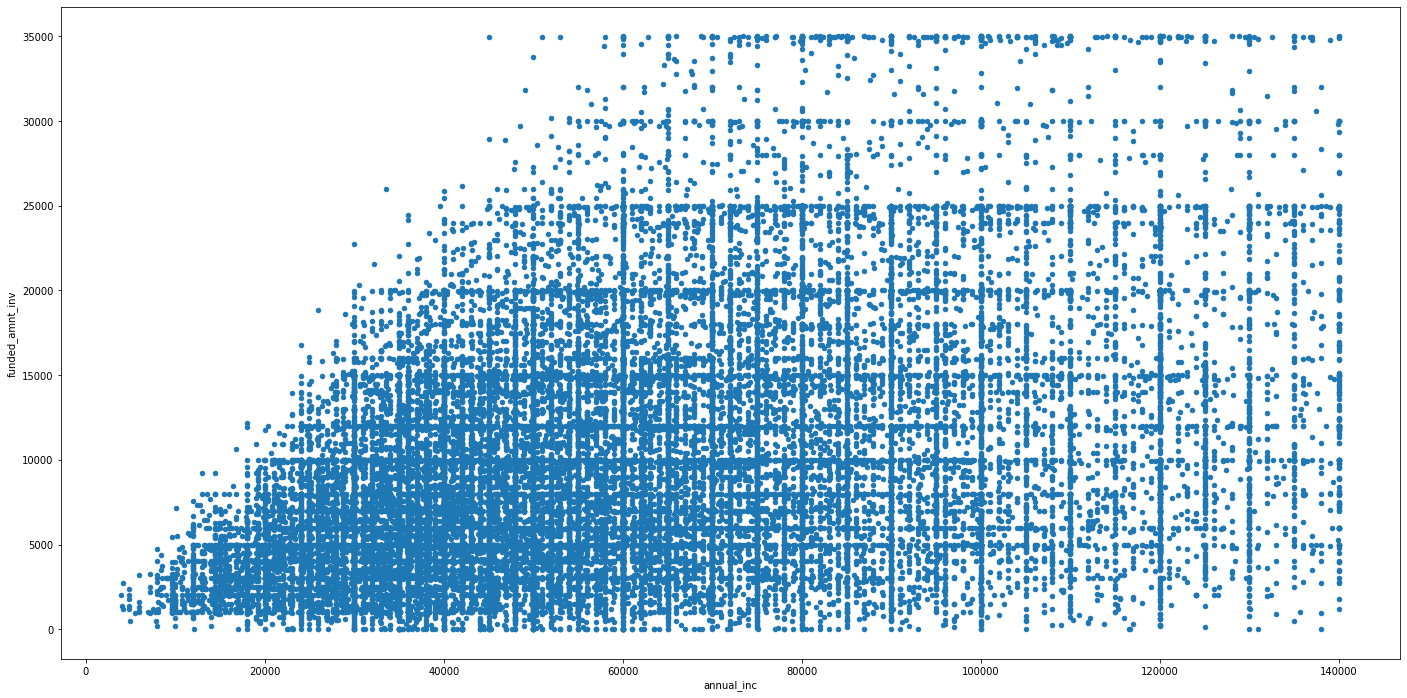

In [102]:
loan_annual.plot.scatter('annual_inc', 'funded_amnt_inv',figsize=[24,12])

In [103]:
loan_annual.funded_amnt_inv.describe()

count    36642.000000
mean      9892.999247
std       6730.054355
min          0.000000
25%       4975.000000
50%       8375.000000
75%      13618.409453
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [104]:
loan_annual['funded_amnt_inv_grp'] = loan_annual.funded_amnt_inv.apply(lambda x: 1 if x < 5000 else (3 if x > 13000 else 2))

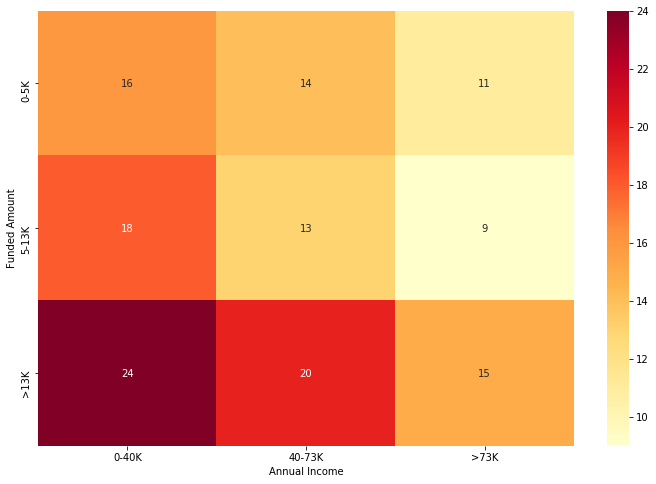

In [105]:
# Plotting the default percentage in each of combination of funded_amnt_group and annual_inc_grp groups 
# We have 3 groups for each - low, medium and high

plt.figure(figsize=(12,8))
xtick = ['0-40K','40-73K','>73K']
ytick = ['0-5K','5-13K','>13K']
test = round(loan_annual.pivot_table(index=['funded_amnt_inv_grp','loan_status'],values='id',columns='annual_inc_grp',aggfunc='count')*100/loan_annual.pivot_table(index=['funded_amnt_inv_grp'],values='id',columns='annual_inc_grp',aggfunc='count')).loc[(slice(None),'Charged Off'),:]
htmp = sns.heatmap(test, cmap='YlOrRd', annot=True, xticklabels=xtick, yticklabels=ytick)
htmp.set(xlabel = 'Annual Income', ylabel = 'Funded Amount')
plt.show()

In [106]:
inc_fund_frame =loan_annual.pivot_table(index='loan_status',values='id',columns=['annual_inc_grp','funded_amnt_inv_grp'],aggfunc='count').transform(lambda x:round(x*100/x.sum())).transpose().sort_values(by='Charged Off',ascending=False)


inc_fund_frame =inc_fund_frame.reset_index()
inc_fund_frame

loan_status,annual_inc_grp,funded_amnt_inv_grp,Charged Off,Fully Paid
0,1,3,24.0,76.0
1,2,3,20.0,80.0
2,1,2,18.0,82.0
3,1,1,16.0,84.0
4,3,3,15.0,85.0
5,2,1,14.0,86.0
6,2,2,13.0,87.0
7,3,1,11.0,89.0
8,3,2,9.0,91.0


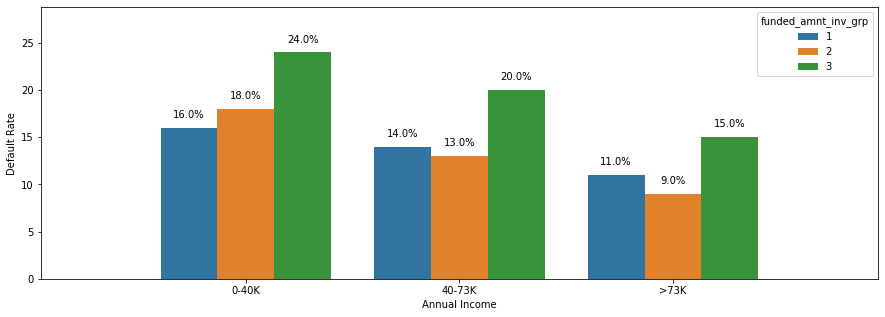

In [107]:
plt.figure(figsize=[15,5])
xtick = ['0-40K','40-73K','>73K']
ax = sns.barplot(data=inc_fund_frame,x='annual_inc_grp',y='Charged Off',hue='funded_amnt_inv_grp')
ax.set(xlabel = 'Annual Income', ylabel = 'Default Rate', xticklabels=xtick)
showLabels(ax)

<i><b>Observations:</b><br>
In all the loan application, funded_amnt_inv is always less the annual_inc of the applicant. <br>
<b>An applicant is likely to default if the annual income is low (<40K) and the funded_amnt_inv is high (>13K). </b><br>
Above plot also confirms the pattern identified in general for each variable holds true even in sub groups<br>
    Higher the funded amount, higher chance of defaulting if the funded_amnt.<br>
    Lower the income of applicant more likely to default</i>

### Analysing installments and monthly_inc

<i>Checking how the variable installments and annual_inc has an impact on the default rate <br></i>

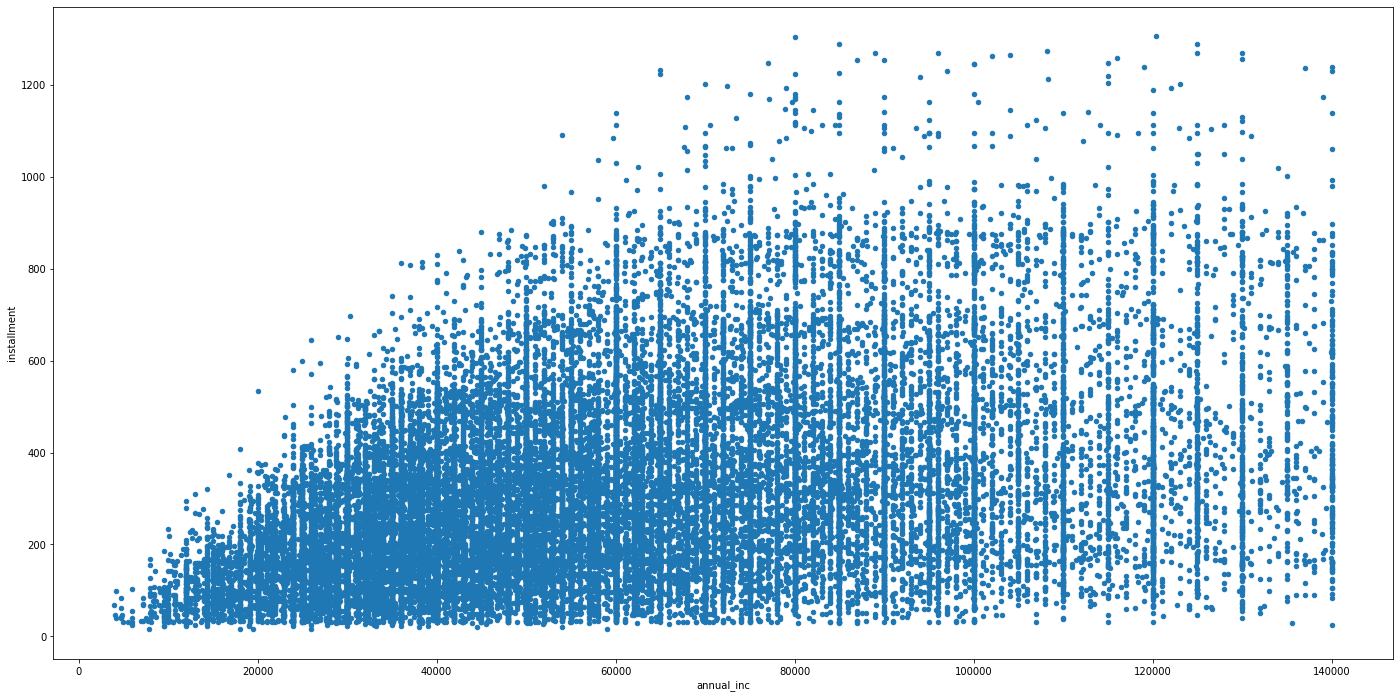

In [108]:
loan_annual.plot.scatter('annual_inc', 'installment',figsize=[24,12])
plt.show()

In [109]:
loan_annual.installment.describe()

count    36642.000000
mean       311.863566
std        199.215000
min         15.690000
25%        163.080000
50%        270.410000
75%        408.480000
max       1305.190000
Name: installment, dtype: float64

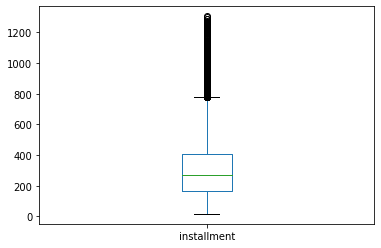

In [110]:
loan_annual.installment.plot.box()
plt.show()

In [111]:
np.percentile(loan_annual.installment,90)

588.9850000000001

In [112]:
loan_annual_inst = loan_annual[loan_annual.installment< 684]

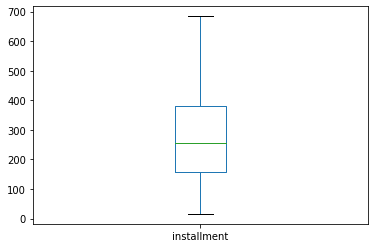

In [113]:
loan_annual_inst.installment.plot.box()

In [114]:
# Finding monthly income from the annual income

loan_annual_inst['monthly_inc'] = loan_annual_inst.annual_inc/12

F:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
# Getting the details of monthly income

loan_annual_inst.monthly_inc.describe()

count    34514.000000
mean      4926.558477
std       2247.365413
min        333.333333
25%       3293.333333
50%       4583.000000
75%       6250.000000
max      11666.666667
Name: monthly_inc, dtype: float64

In [116]:
# Classifying the monthly_income as 1,2 and 3 (low, medium and high)

loan_annual_inst['monthly_inc_grp'] = loan_annual_inst.monthly_inc.apply(lambda x: 1 if x < 3200 else (3 if x > 6000 else 2))

F:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
# Classifying the installments to 1,2 and 3 groups (low, medium and high)

loan_annual_inst['installment_grp'] = loan.installment.apply(lambda x: 1 if x < 156 else (3 if x > 374 else 2))

F:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


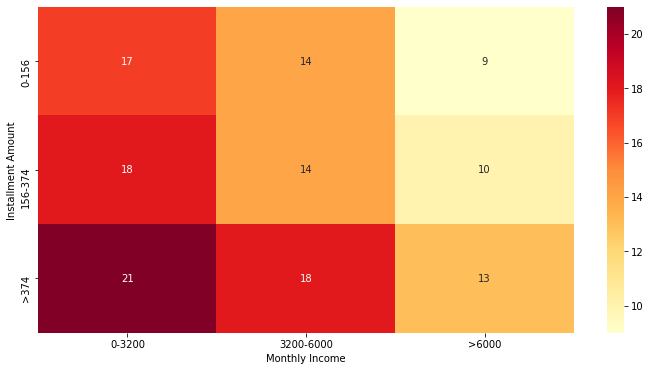

In [118]:
# Plotting the default percentage in each of combination of installment_grp and monthly_inc_grp groups 
# We have 3 groups for each - low, medium and high

plt.figure(figsize=(12,6))
xtick = ['0-3200','3200-6000','>6000']
ytick = ['0-156','156-374','>374']
test = round(loan_annual_inst.pivot_table(index=['installment_grp','loan_status'],values='id',columns='monthly_inc_grp',aggfunc='count')*100/loan_annual_inst.pivot_table(index=['installment_grp'],values='id',columns='monthly_inc_grp',aggfunc='count')).loc[(slice(None),'Charged Off'),:]
htmp = sns.heatmap(test,cmap='YlOrRd',annot=True, xticklabels=xtick, yticklabels=ytick)
htmp.set(xlabel = 'Monthly Income', ylabel = 'Installment Amount')
plt.show()

In [119]:
loan_inst_frame =loan_annual_inst.pivot_table(index='loan_status',values='id',columns=['monthly_inc_grp','installment_grp'],aggfunc='count').transform(lambda x:round(x*100/x.sum())).transpose().sort_values(by='Charged Off',ascending=False)


loan_inst_frame =loan_inst_frame.reset_index()
loan_inst_frame

loan_status,monthly_inc_grp,installment_grp,Charged Off,Fully Paid
0,1,3,21.0,79.0
1,1,2,18.0,82.0
2,2,3,18.0,82.0
3,1,1,17.0,83.0
4,2,1,14.0,86.0
5,2,2,14.0,86.0
6,3,3,13.0,87.0
7,3,2,10.0,90.0
8,3,1,9.0,91.0


[Text(0, 0.5, 'Default Rate'),
 [Text(0, 0, '0-3200'), Text(0, 0, '3200-6000'), Text(0, 0, '>6000')],
 Text(0.5, 0, 'Monthly Income Groups')]

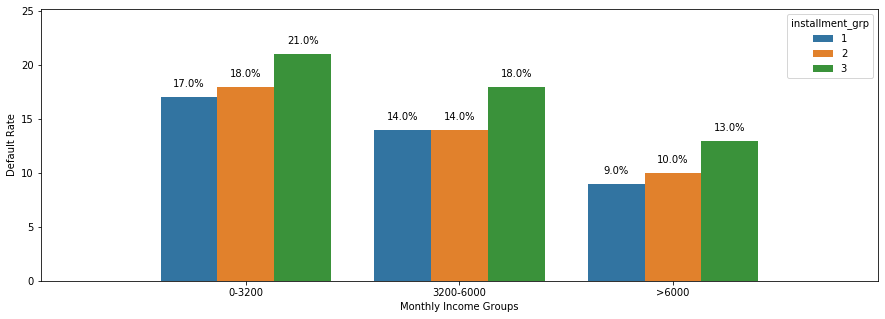

In [120]:
plt.figure(figsize=[15,5])
xtick = ['0-3200','3200-6000','>6000']
ax = sns.barplot(data=loan_inst_frame,x='monthly_inc_grp',y='Charged Off',hue='installment_grp')
showLabels(ax)
ax.set(xlabel = 'Monthly Income Groups', ylabel = 'Default Rate', xticklabels=xtick)

<i><b>Observations:</b><br>
In all the loan application, installment is always less the monthly income of the applicant. <br>
An applicant is likely to default if the monthly income is low (< 3200) and the installment is high (> 374). <br>
This is the reflection of analysis of funded amount and annual income on the default percentage and validates that analysis</i>

### Analysing funded_amnt_inv and int_rate_rounded

<i>Checking how the variable funded_amnt_inv and int_rate_rounded has an impact on the default rate <br></i>

In [121]:
loan_annual_inst.int_rate_rounded.describe()

count    34514.000000
mean        11.723156
std          3.594351
min          5.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         24.000000
Name: int_rate_rounded, dtype: float64

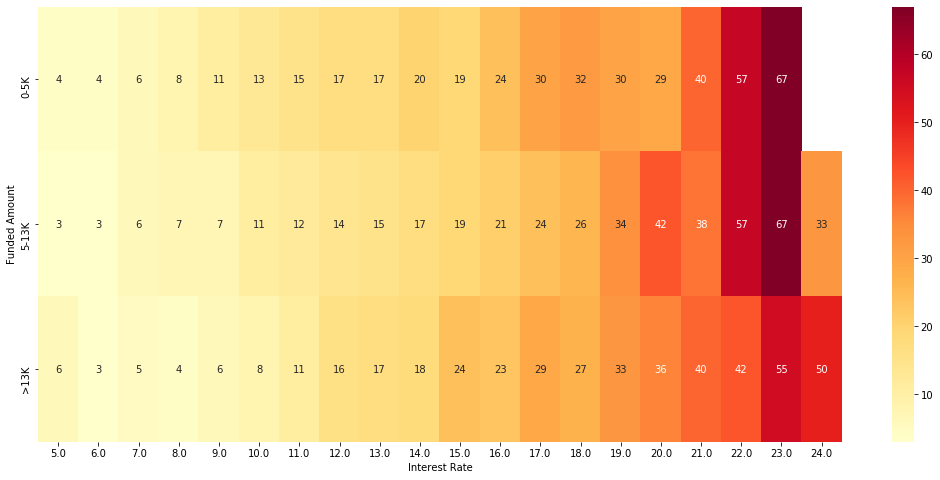

In [122]:
# Plotting the default percentage in each of combination of funded_amnt_group and interest rate groups 
# We have 3 groups for each - low, medium and high

plt.figure(figsize=(18,8))
ytick = ['0-5K','5-13K','>13K']
test = round(loan_annual_inst.pivot_table(index=['funded_amnt_inv_grp','loan_status'],values='id',columns='int_rate_rounded',aggfunc='count')*100/loan_annual_inst.pivot_table(index=['funded_amnt_inv_grp'],values='id',columns='int_rate_rounded',aggfunc='count')).loc[(slice(None),'Charged Off'),:]
htmp = sns.heatmap(test,cmap='YlOrRd', annot=True, yticklabels=ytick)
htmp.set(xlabel = 'Interest Rate', ylabel = 'Funded Amount')
plt.show()

In [123]:
fund_intr_frame =loan_annual_inst.pivot_table(index='loan_status',values='id',columns=['funded_amnt_inv_grp','int_rate_rounded'],aggfunc='count').transform(lambda x:round(x*100/x.sum())).transpose().sort_values(by='Charged Off',ascending=False)


fund_intr_frame =fund_intr_frame.reset_index()
fund_intr_frame

loan_status,funded_amnt_inv_grp,int_rate_rounded,Charged Off,Fully Paid
0,2,23.0,67.0,33.0
1,1,23.0,67.0,33.0
2,2,22.0,57.0,43.0
3,1,22.0,57.0,43.0
4,3,23.0,55.0,45.0
5,3,24.0,50.0,50.0
6,3,22.0,42.0,58.0
7,2,20.0,42.0,58.0
8,1,21.0,40.0,60.0
9,3,21.0,40.0,60.0


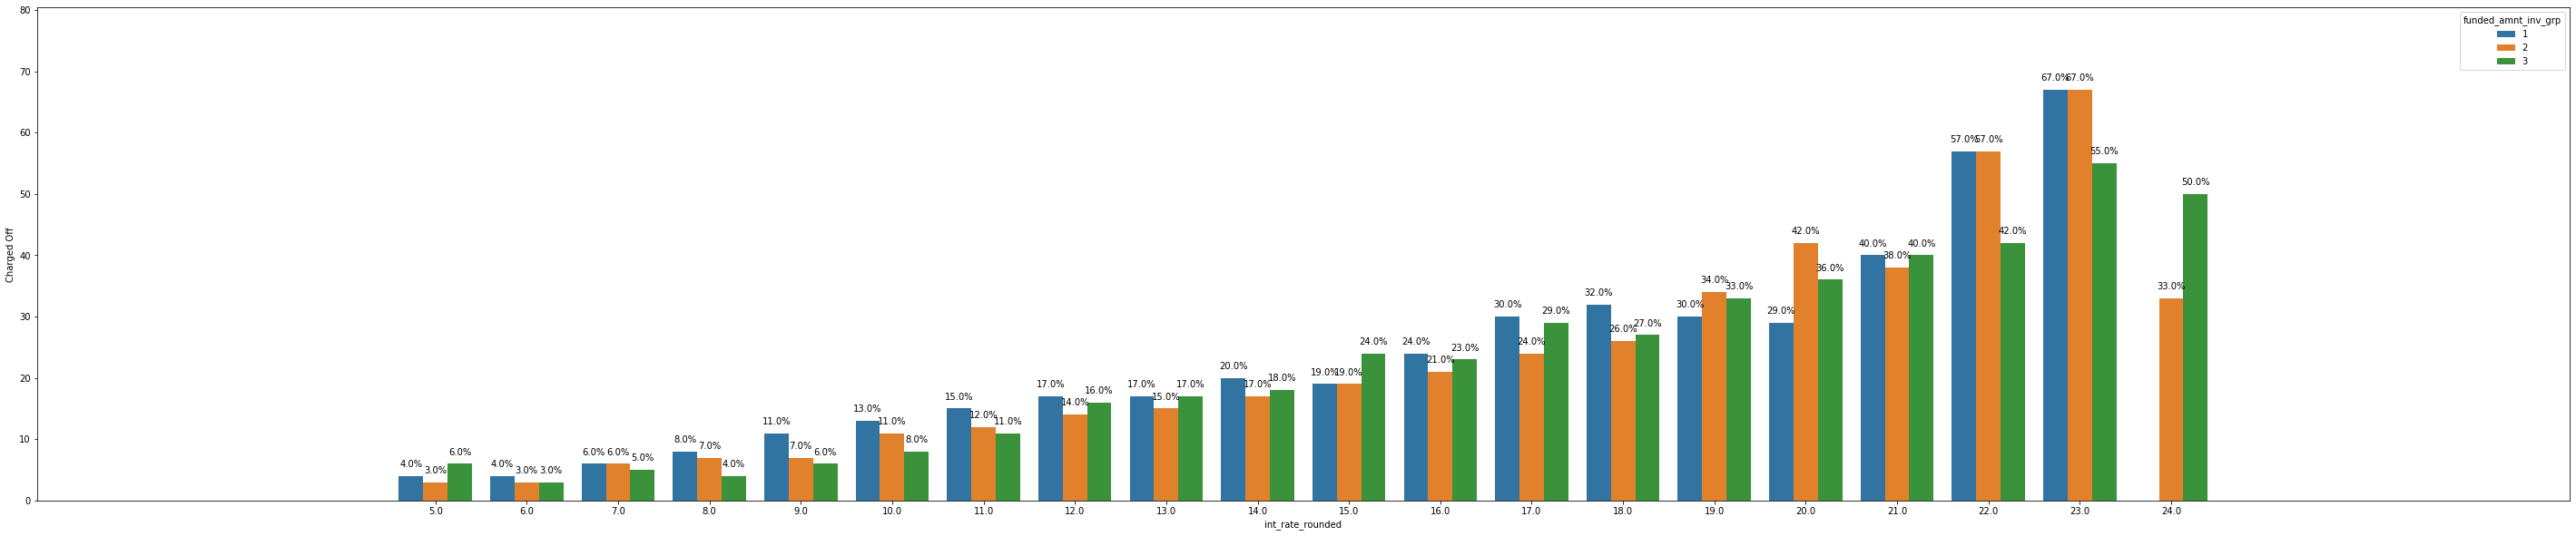

In [124]:
plt.figure(figsize=[50,10])
ax = sns.barplot(data=fund_intr_frame,x='int_rate_rounded',y='Charged Off',hue='funded_amnt_inv_grp')
showLabels(ax)

<i><b>Observation</b> <br>
From the plot it looks like an applicant with a lower funded amount charged with a higher interest rate is more likely to default. <br>
Also it aligns with the general trend that default rate increases with increae in int_rate.
</i>

There is ahance that high interest rate is provided to g grade loans so that most of the funded amount is returned even if defaulted

### Analysing purpose and emp_length

<i>Checking how the default rate varies among different emp_length and purpose <br></i>

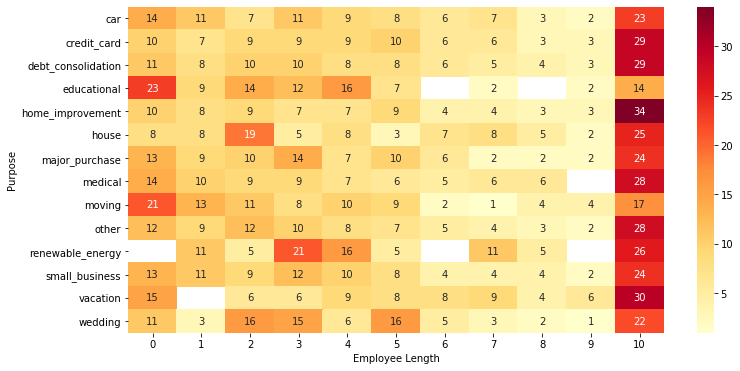

In [125]:
# Plotting how the Charged Off loans for each purpose are distributed among different emp_length

plt.figure(figsize=(12,6))
test1 = loan[loan.loan_status=='Charged Off'].pivot_table(index='purpose',values='id',columns='emp_length',aggfunc='count').transform(lambda x: round(x*100/x.sum()),axis=1)
htmp = sns.heatmap(test1,cmap='YlOrRd',annot=True)
htmp.set(xlabel = 'Employee Length', ylabel = 'Purpose')
plt.show()

<i><b>Observations:</b><br>
Considering the employee length 0-9 years we could infer the following
Most of the defaulters in Educational and Moving loan happens for applicants with less than 1 year of experience. The default percentage is low even for 10+ years compared to other purpose <br>
There is higher number of defaults happening in the initial stages of employment (<1 year) except for loans on 'Wedding', 'House', 'Renewable Energy'. <br>
The trends we have identified might be because the loan applicants are larger in those areas
</i>

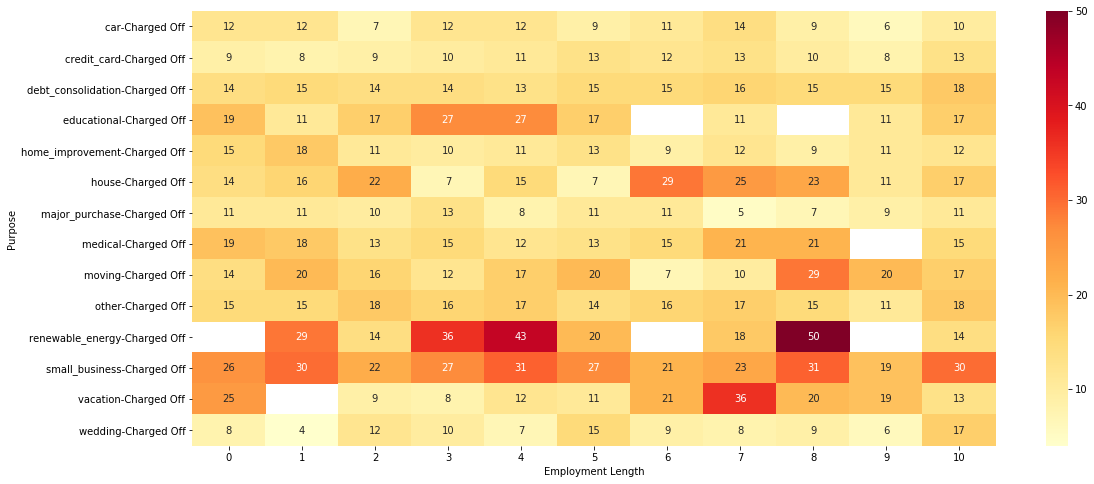

In [126]:
# Plotting the default percentage in each of combination of funded_amnt_group and interest rate groups 
# We have 3 groups for each - low, medium and high

plt.figure(figsize=(18,8))
test = round(loan.pivot_table(index=['purpose','loan_status'],values='id',columns='emp_length',aggfunc='count')*100/loan.pivot_table(index=['purpose'],values='id',columns='emp_length',aggfunc='count')).loc[(slice(None),'Charged Off'),:]
htmp = sns.heatmap(test,cmap='YlOrRd', annot=True)
htmp.set(xlabel = 'Employment Length', ylabel = 'Purpose')
plt.show()

<i><b>Observations:</b><br>
Considering the employee length 0-9 years we could infer the following
Default percentage is high for Educational loans taken with emp_length 2 and 3 years <br>
Default percentage is high for House loans taken with emp_length 6 to 8 years <br>
 Same is the case with Medical loan <br>
There is higher number of defaults happening in the initial stages of employment (<1 year) except for loans on 'Wedding', 'House', 'Renewable Energy'. <br>
</i>